In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
np.random.seed(1)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [ ]:
# Creating data points in the form of a circle
df = pd.DataFrame(PointsInCircum(500, 1000))
df = pd.concat([df, pd.DataFrame(PointsInCircum(300, 700))])
df = pd.concat([df, pd.DataFrame(PointsInCircum(100, 300))])

a=[(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)]
df_a = pd.DataFrame(a)
df = pd.concat([df, df_a])

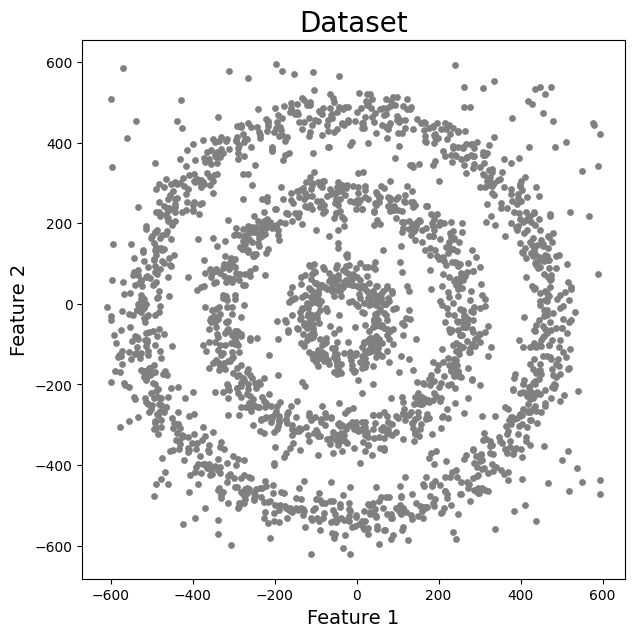

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
#Kmeans
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])
df['KMeans_labels']=k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Hierarchical
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])
df['HR_labels']=model.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=30,min_samples=6)
model.fit(df[[0,1]])
df['DBSCAN_labels']=model.labels_

Text(0, 0.5, 'Feature 2')

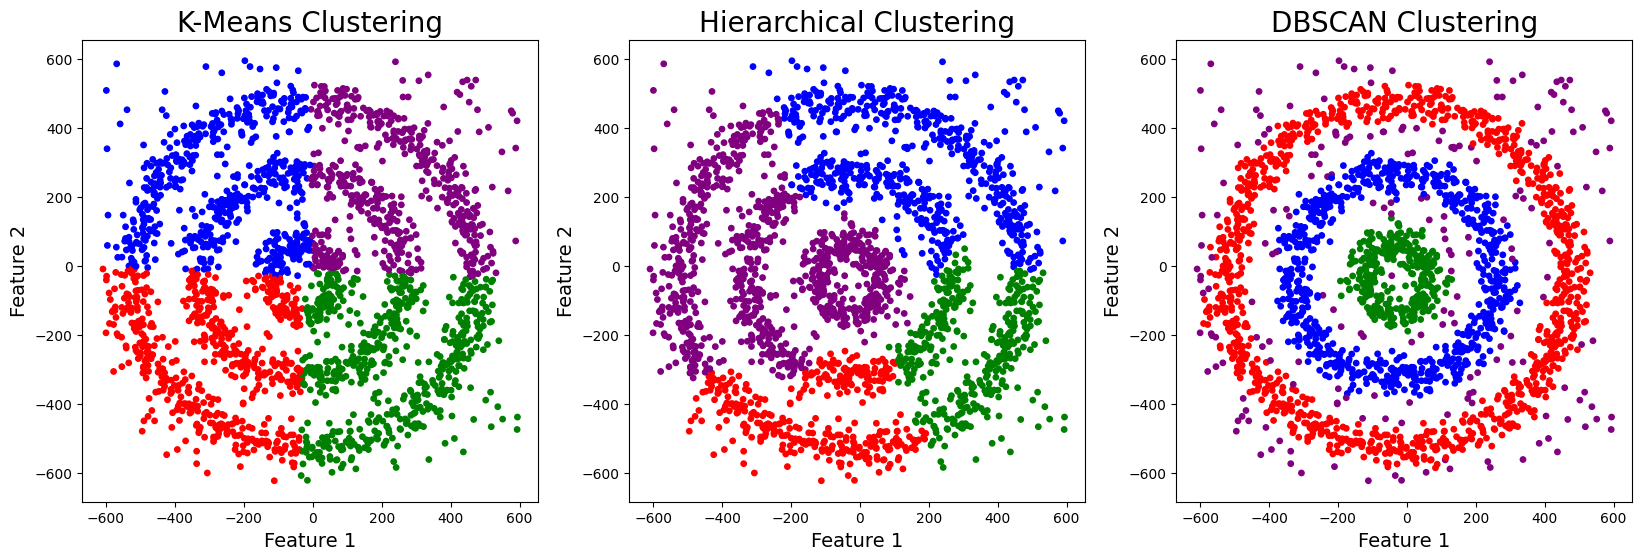

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
colors=['purple','red','blue','green']

axes[0].scatter(df[0],df[1],c=df['KMeans_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
axes[0].set_title('K-Means Clustering',fontsize=20)
axes[0].set_xlabel('Feature 1',fontsize=14)
axes[0].set_ylabel('Feature 2',fontsize=14)

axes[1].scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
axes[1].set_title('Hierarchical Clustering',fontsize=20)
axes[1].set_xlabel('Feature 1',fontsize=14)
axes[1].set_ylabel('Feature 2',fontsize=14)

axes[2].scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
axes[2].set_title('DBSCAN Clustering',fontsize=20)
axes[2].set_xlabel('Feature 1',fontsize=14)
axes[2].set_ylabel('Feature 2',fontsize=14)